In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Economics of Cybersecurity - Case Study

In this case study, we are studying the effects of the Target data breach of 2013.

## FireEye

We will first study FireEye. FireEye was the company Target contracted its cybersecurity monitoring. FireEye was introduced to the stock market in September 23, 2013. Therefore the earliest date we can start from is September 23. We will start by importing the data. 

You can find the data in the following links:
- [FireEye (MNDT)](https://www.marketwatch.com/investing/stock/MNDT)
- [S&P 500 (SP)](https://www.marketwatch.com/investing/index/spx)

Next step after downloading these files is to clean the dataframe with clean_data.py

In [2]:
dfs = [pd.read_csv(file_name)[::-1] for file_name in ['SP.csv', 'MNDT.csv', 'TGT.csv']]
dfs = [df.reset_index() for df in dfs]
setting = 'High'
dfs[0][setting] = dfs[0][setting].apply(lambda x: x.replace(',', '')).astype("float64")

In [98]:
dfs[0]

,index,Date,Open,High,Low,Close
0,109,09/23/2013,"1,711.44",1711.44,"1,697.10","1,701.84"
1,108,09/24/2013,"1,702.60",1707.63,"1,694.90","1,697.42"
2,107,09/25/2013,"1,698.02",1701.71,"1,691.88","1,692.77"
3,106,09/26/2013,"1,694.05",1703.85,"1,693.11","1,698.67"
4,105,09/27/2013,"1,695.52",1695.52,"1,687.11","1,691.75"
...,...,...,...,...,...,...
105,4,02/24/2014,"1,836.78",1858.71,"1,836.78","1,847.61"
106,3,02/25/2014,"1,847.66",1852.91,"1,840.19","1,845.12"
107,2,02/26/2014,"1,845.79",1852.65,"1,840.66","1,845.16"
108,1,02/27/2014,"1,844.90",1854.53,"1,841.13","1,854.29"


Target confirms the attack on December 16th. Closest day in our data is December 16th:

In [96]:
dfs[1].iloc[59,:]

index            50
Date     12/16/2013
Open       1,777.48
High        1792.22
Low        1,777.48
Close      1,786.54
Name: 59, dtype: object

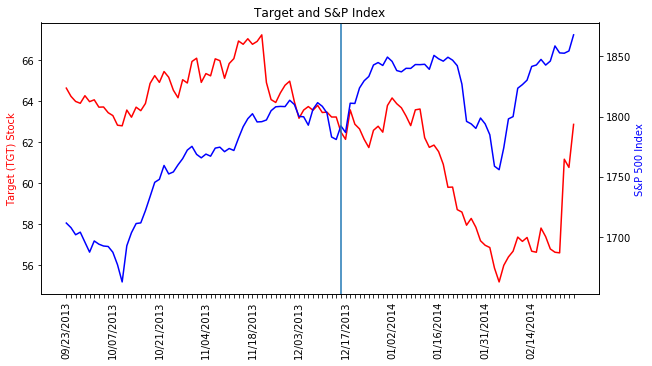

In [104]:
fig,ax = plt.subplots(figsize=(10,5))
plt.xticks(rotation=90)
plt.title("Target and S&P Index")

ax.plot(dfs[2]['Date'], dfs[2][setting], label='TGT', color = 'red')
ax.set_ylabel("Target (TGT) Stock", color='red')

ax2 = ax.twinx()
ax2.plot(dfs[0]['Date'], dfs[0][setting], label='S&P', color = 'blue')
ax2.set_ylabel("S&P 500 Index", color='blue')

for label in ax.xaxis.get_ticklabels():
    label.set_visible(False)

for label in ax.xaxis.get_ticklabels()[::10]:
    label.set_visible(True)

plt.axvline(x=59)

plt.show()

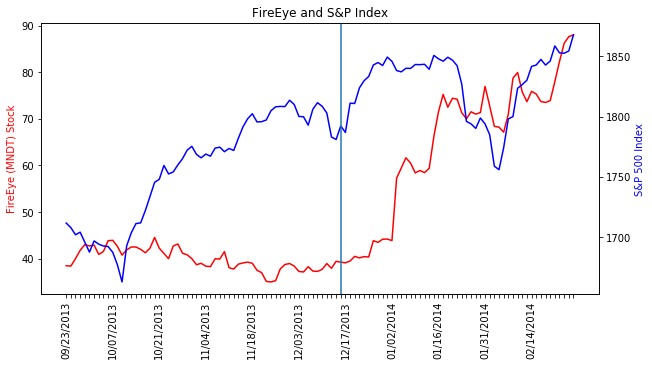

In [101]:
fig,ax = plt.subplots(figsize=(10,5))
plt.xticks(rotation=90)
plt.title("FireEye and S&P Index")

ax.plot(dfs[1]['Date'], dfs[1][setting], label='MNDT', color = 'red')
ax.set_ylabel("FireEye (MNDT) Stock", color='red')

ax2 = ax.twinx()
ax2.plot(dfs[0]['Date'], dfs[0][setting], label='S&P', color = 'blue')
ax2.set_ylabel("S&P 500 Index", color='blue')

for label in ax.xaxis.get_ticklabels():
    label.set_visible(False)

for label in ax.xaxis.get_ticklabels()[::10]:
    label.set_visible(True)

plt.axvline(x=59)

plt.show()

In [12]:
capm_df = pd.read_csv("capm.csv", delimiter=';').dropna()
capm_df

,Date,SP,MNDT,TGT,?SP,?MNDT,?TGT
1,09/24/2013,1707.63,38.40,64.25,-0.002226,-0.002079,-0.006187
2,09/25/2013,1701.71,40.00,64.00,-0.003467,0.041667,-0.003891
3,09/26/2013,1703.85,41.78,63.91,0.001258,0.044500,-0.001406
4,09/27/2013,1695.52,43.00,64.28,-0.004889,0.029201,0.005789
5,09/30/2013,1687.26,42.72,63.99,-0.004872,-0.006512,-0.004512
...,...,...,...,...,...,...,...
105,02/24/2014,1858.71,77.98,56.64,0.006814,0.055495,-0.002817
106,02/25/2014,1852.91,82.30,56.61,-0.003120,0.055399,-0.000530
107,02/26/2014,1852.65,86.18,61.18,-0.000140,0.047145,0.080728
108,02/27/2014,1854.53,87.61,60.78,0.001015,0.016593,-0.006538


In [15]:
capm_df[capm_df['Date'] == '12/16/2013']

,Date,SP,MNDT,TGT,?SP,?MNDT,?TGT
59,12/16/2013,1792.22,39.25,62.51,0.006345,-0.004313,-0.011543


In [20]:
capm_df[59:]

,Date,SP,MNDT,TGT,?SP,?MNDT,?TGT
60,12/17/2013,1786.77,39.10,62.15,-0.003041,-0.003822,-0.005759
61,12/18/2013,1811.08,39.49,63.59,0.013606,0.009974,0.023170
62,12/19/2013,1810.88,40.49,62.89,-0.000110,0.025323,-0.011008
63,12/20/2013,1823.75,40.16,62.66,0.007107,-0.008150,-0.003657
64,12/23/2013,1829.75,40.43,62.15,0.003290,0.006723,-0.008139
65,12/24/2013,1833.32,40.35,61.75,0.001951,-0.001979,-0.006436
66,12/26/2013,1842.84,43.85,62.59,0.005193,0.086741,0.013603
67,12/27/2013,1844.89,43.49,62.79,0.001112,-0.008210,0.003195
68,12/30/2013,1842.47,44.17,62.50,-0.001312,0.015636,-0.004619
69,12/31/2013,1849.44,44.20,63.80,0.003783,0.000679,0.020800


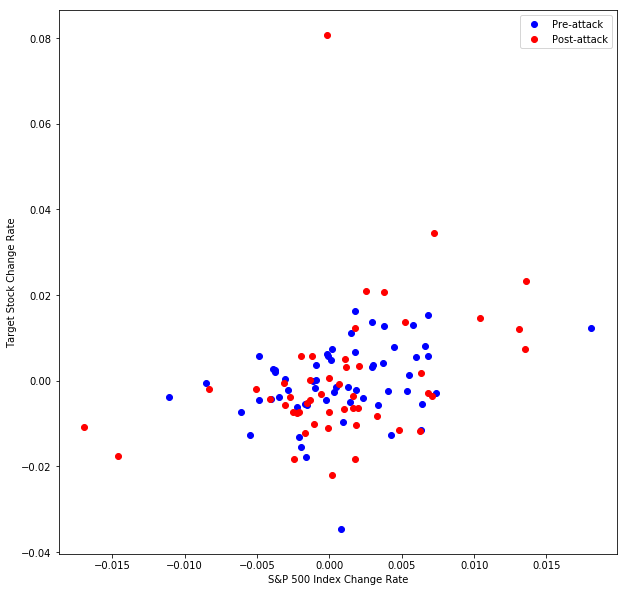

In [30]:
divide_from = 59

x = capm_df['?SP']
y = capm_df['?TGT']

plt.figure(figsize=(10,10))
plt.plot(x[:divide_from], y[:divide_from], 'bo', label='Pre-attack')
plt.plot(x[divide_from:], y[divide_from:], 'ro', label='Post-attack')
plt.legend()
plt.ylabel('Target Stock Change Rate')
plt.xlabel('S&P 500 Index Change Rate')
plt.show()

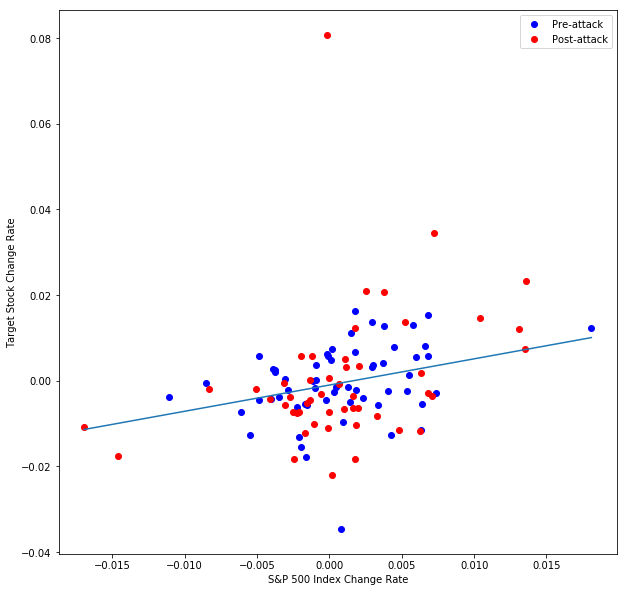

In [29]:
plt.figure(figsize=(10,10))
plt.plot(x[:divide_from], y[:divide_from], 'bo', label='Pre-attack')
plt.plot(x[divide_from:], y[divide_from:], 'ro', label='Post-attack')
plt.legend()
plt.ylabel('Target Stock Change Rate')
plt.xlabel('S&P 500 Index Change Rate')

p = [0.612019721, -0.001016029]
line = lambda x: p[0] * x + p[1]
boundaries = [x.min(), x.max()]
plt.plot(boundaries, [line(i) for i in boundaries])
plt.show()

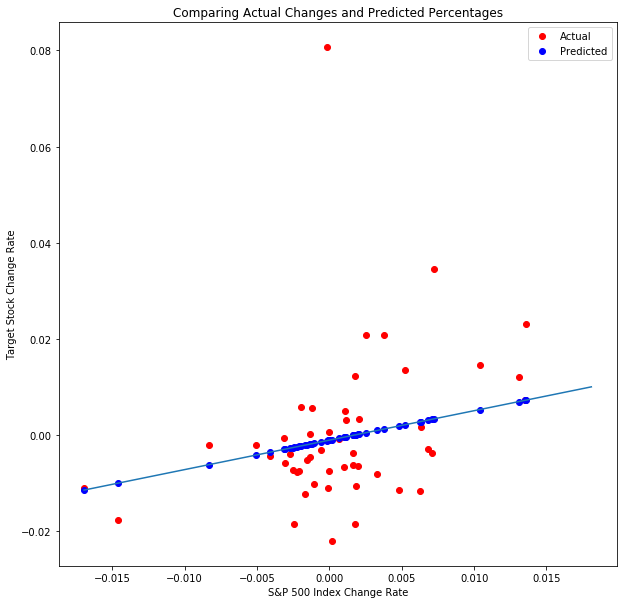

In [32]:
predicted = [line(i) for i in x[divide_from:]]

plt.figure(figsize=(10,10))
plt.title("Comparing Actual Changes and Predicted Percentages")
plt.plot(x[divide_from:], y[divide_from:], 'ro', label='Actual')
plt.plot(x[divide_from:], predicted, 'bo', label='Predicted')
plt.legend()
plt.ylabel('Target Stock Change Rate')
plt.xlabel('S&P 500 Index Change Rate')

plt.plot(boundaries, [line(i) for i in boundaries])
plt.show()